✅ Cleaned data loaded:
✅ Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         26304 non-null  datetime64[ns]
 1   Demand       26304 non-null  float64       
 2   Temperature  26304 non-null  float64       
 3   Humidity     26304 non-null  float64       
 4   WindSpeed    26304 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.0 MB

✅ Data Description:


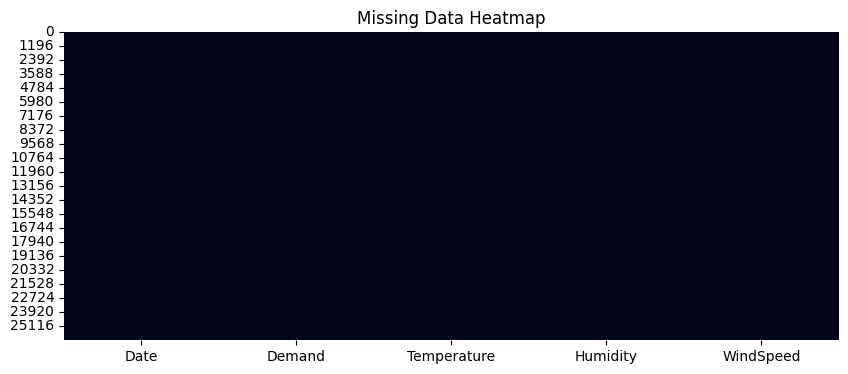

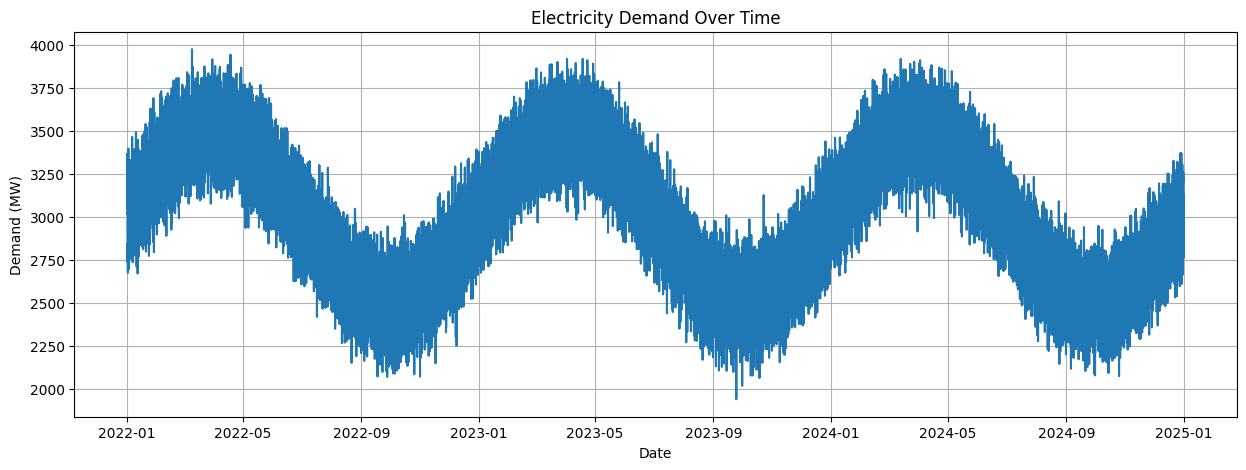

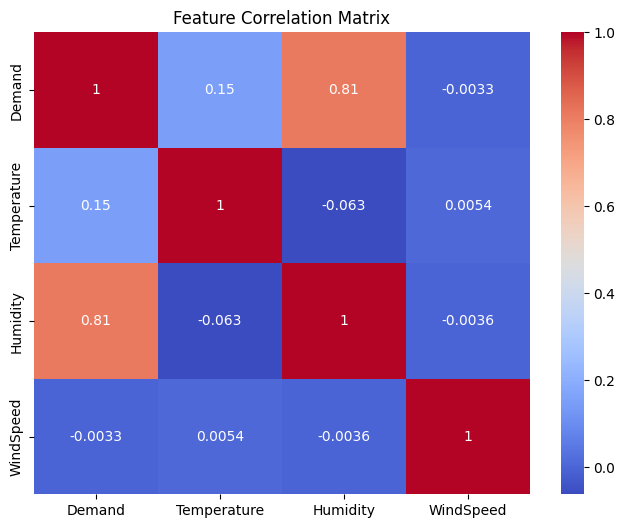

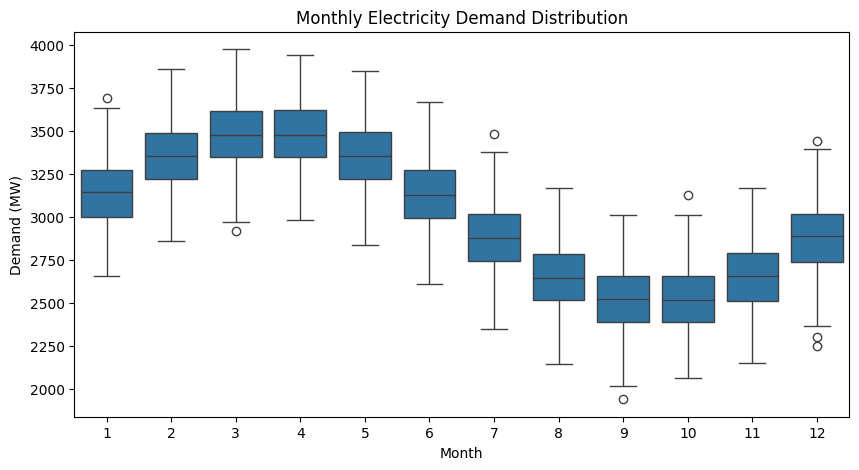

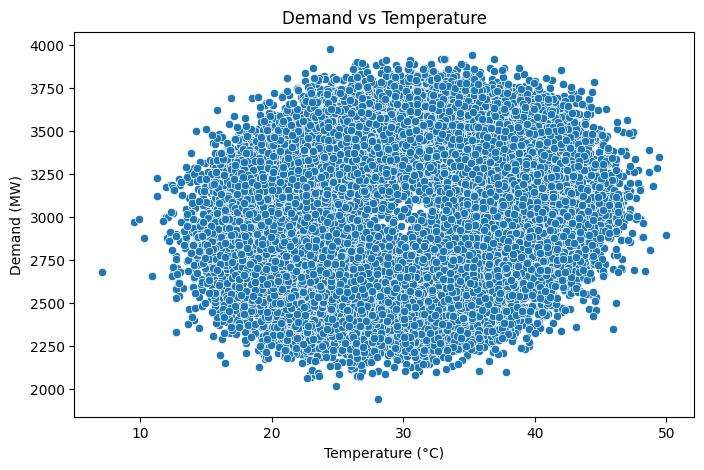

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Notebook: exploratory_analysis.ipynb

#  Cell 1: Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Optional: Configure Plotly for Jupyter Notebook
import plotly.io as pio
pio.renderers.default = "notebook_connected"

#  Cell 2: Load cleaned data
import os
cleaned_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'processed', 'cleaned_data.csv'))
df = pd.read_csv(cleaned_path, parse_dates=["Date"])
print(" Cleaned data loaded:")
df.head()

#  Cell 3: Data Overview
print(" Data Info:")
df.info()
print("\n Data Description:")
df.describe()

#  Cell 4: Missing Values Heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

#  Cell 5: Demand Over Time
plt.figure(figsize=(15, 5))
plt.plot(df["Date"], df["Demand"], color='tab:blue')
plt.title("Electricity Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.show()

#  Cell 6: Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

#  Cell 7: Demand by Month
df["Month"] = df["Date"].dt.month
plt.figure(figsize=(10, 5))
sns.boxplot(x="Month", y="Demand", data=df)
plt.title("Monthly Electricity Demand Distribution")
plt.xlabel("Month")
plt.ylabel("Demand (MW)")
plt.show()

#  Cell 8: Demand vs Temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Temperature", y="Demand", data=df)
plt.title("Demand vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Demand (MW)")
plt.show()

#  Cell 9: Interactive Trend Plot
fig = px.line(df, x="Date", y="Demand", title="Interactive Demand Trend")
fig.show()